# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [7]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv('news_api')

In [8]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='863a64d7c3a04497b6767fc06ca4e2ef')

In [12]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(
q="Bitcoin OR BTC or bitcoin", 
language="en",
page_size=100,
sort_by="relevancy")
print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}")

Total articles about Bitcoin: 2892


In [13]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(
q='Ethereum OR ETH or ethereum',
language="en",
page_size=100,
sort_by="relevancy")
print(f"Total articles about Ethereum: {ethereum_articles['totalResults']}")

Total articles about Ethereum: 810


In [51]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
btc_df = btc_df[cols]

btc_df.head()

,compound,positive,negative,neutral,text
0,0.4404,0.152,0.075,0.773,If youve been watching the crypto markets over...
1,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...
2,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,..."
3,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
4,0.0000,0.000,0.000,1.000,FILE PHOTO: Representations of virtual currenc...


In [55]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()
         

,compound,positive,negative,neutral,text
0,0.0000,0.000,0.000,1.000,The New York Times is (probably) about to publ...
1,0.5106,0.088,0.000,0.912,Each comment or response costs a tiny ETH fee ...
2,0.8779,0.318,0.000,0.682,"PayPal has launched the Generosity Network, a ..."
3,0.2263,0.075,0.047,0.878,"LONDON (Reuters) - Bitcoin passed $17,000 on T..."
4,0.5719,0.139,0.000,0.861,LONDON/NEW YORK (Reuters) - Bitcoin on Tuesday...


In [53]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,99.000000,99.000000,99.000000,99.000000
mean,0.142940,0.070323,0.036101,0.893556
std,0.431827,0.076579,0.059684,0.083199
min,-0.840200,0.000000,0.000000,0.664000
25%,0.000000,0.000000,0.000000,0.850000
50%,0.177900,0.055000,0.000000,0.893000
75%,0.497400,0.132000,0.062000,0.948000
max,0.934900,0.336000,0.225000,1.000000


In [56]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.266184,0.085265,0.019939,0.894796
std,0.343821,0.079166,0.040967,0.088386
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.839250
50%,0.226300,0.075000,0.000000,0.904000
75%,0.557400,0.132750,0.000000,0.959500
max,0.883400,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [ ]:
Question 1 answer : Ethereum 
Question 2 answer: Bitcoin
Question 3 answer: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [59]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [60]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {}

In [61]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase remove stopwords
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens


In [62]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
btc_df['tokens']=[tokenizer(word) for word in btc_df['text']]
btc_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.4404,0.152,0.075,0.773,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."
1,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
2,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
3,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."
4,0.0000,0.000,0.000,1.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representations, virtual, curren..."


In [63]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_df['tokens']=[tokenizer(word) for word in ethereum_df['text']]
ethereum_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.0000,0.000,0.000,1.000,The New York Times is (probably) about to publ...,"[new, york, times, probably, publish, story, c..."
1,0.5106,0.088,0.000,0.912,Each comment or response costs a tiny ETH fee ...,"[comment, response, cost, tiny, eth, fee, ethe..."
2,0.8779,0.318,0.000,0.682,"PayPal has launched the Generosity Network, a ...","[paypal, ha, launched, generosity, network, pl..."
3,0.2263,0.075,0.047,0.878,"LONDON (Reuters) - Bitcoin passed $17,000 on T...","[london, reuters, bitcoin, passed, tuesday, to..."
4,0.5719,0.139,0.000,0.861,LONDON/NEW YORK (Reuters) - Bitcoin on Tuesday...,"[londonnew, york, reuters, bitcoin, tuesday, s..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [64]:
from collections import Counter
from nltk import ngrams

In [65]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_all_text = []
for token in btc_df['tokens']:
    for text in token:
        btc_all_text.append(text)
btc_bigram_counter = Counter(ngrams(btc_all_text, n=2))
print(dict(btc_bigram_counter.most_common(10)))

{('reuters', 'bitcoin'): 12, ('char', 'london'): 11, ('london', 'reuters'): 11, ('new', 'york'): 11, ('york', 'reuters'): 10, ('digital', 'currency'): 9, ('alltime', 'high'): 9, ('char', 'sydney'): 9, ('sydney', 'reuters'): 9, ('virtual', 'currency'): 8}


In [66]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_all_text = []
for token in ethereum_df['tokens']:
    for text in token:
        ethereum_all_text.append(text)
ethereum_bigram_counter = Counter(ngrams(ethereum_all_text, n=2))
print(dict(ethereum_bigram_counter.most_common(10)))

{('char', 'bitcoin'): 10, ('char', 'ethereum'): 9, ('decentralized', 'finance'): 8, ('finance', 'defi'): 6, ('bitcoin', 'btc'): 5, ('ether', 'eth'): 5, ('reuters', 'bitcoin'): 4, ('highest', 'level'): 4, ('ethereum', 'blockchain'): 4, ('beacon', 'chain'): 4}


In [67]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [68]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_all_text)

[('char', 99),
 ('bitcoin', 48),
 ('reuters', 44),
 ('currency', 26),
 ('high', 23),
 ('year', 22),
 ('ha', 20),
 ('cryptocurrency', 19),
 ('new', 18),
 ('investor', 17)]

In [69]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethereum_all_text)

[('char', 98),
 ('ethereum', 47),
 ('bitcoin', 32),
 ('ha', 27),
 ('blockchain', 18),
 ('eth', 16),
 ('year', 14),
 ('price', 13),
 ('defi', 13),
 ('cryptocurrency', 11)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [137]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/christinasullivan/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christinasullivan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christinasullivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christinasullivan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [140]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def processed_text(corpus):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

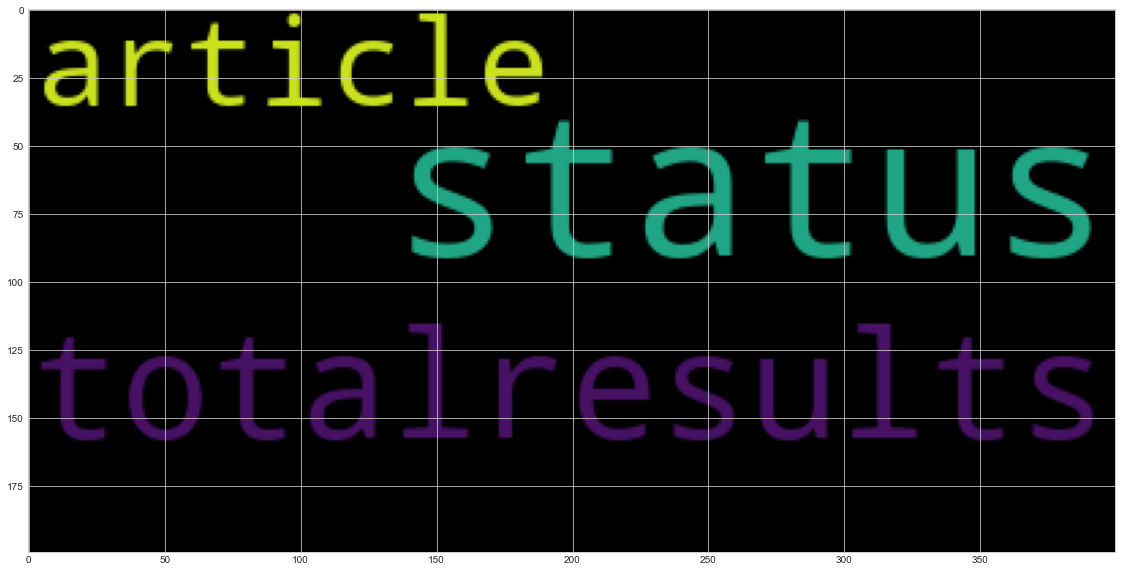

In [143]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [113]:
import spacy
from spacy import displacy

In [114]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [117]:
# Load the spaCy model
nlp = spacy.load('en')

## Bitcoin NER

In [118]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_text = []

for text in btc_df['text']:
    text = text
    btc_text.append(text)
    
big_string_btc = ' '.join(btc_text)

In [120]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(big_string_btc)

# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data['title'] = 'Bitcoin NER'

In [121]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [123]:
# List all Entities
# YOUR CODE HERE!
for ent in btc_doc.ents:
    print (ent, ent.label_)

the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Visa ORG
first ORDINAL
Bitcoin GPE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Six years DATE
Mexico GPE
$62 million MONEY
today DATE
first ORDINAL
Elon Musk ORG
Earth LOC
Tom Wilson PERSON
Chavez-Dreyfuss PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
LONDON GPE
Reuters ORG
Bitcoin GPE
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Reuters ORG
Brexit ORG
March 30, 2019 DATE
REUTERS/ ORG
Iran GPE
Bitcoin GPE
Central Bank to Fund

---

## Ethereum NER

In [124]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
ethereum_text = []
for text in ethereum_df['text']:
    text = text
    ethereum_text.append(text)
    
big_string_ethereum = ' '.join(ethereum_text)

In [125]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_doc = nlp(big_string_ethereum)

# Add a title to the document
# YOUR CODE HERE!
ethereum_doc.user_data['title'] = 'Ethereum NER'

In [126]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_doc, style='ent')

In [127]:
# List all Entities
# YOUR CODE HERE!
for ent in ethereum_doc.ents:
    print (ent, ent.label_)

The New York Times ORG
Coinbase ORG
ETH ORG
0.00011 CARDINAL
about 5¢ CARDINAL
PayPal PRODUCT
the Generosity Network ORG
20,000 MONEY
LONDON GPE
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Tom Wilson PERSON
Chavez-Dreyfuss PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Bitcoin GPE
Ethereum GPE
bitcoin GPE
Payp PERSON
Hala Systems ORG
Hedera ORG
Syrians NORP
Hala Systems ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
Zynga GPE
Eric Schiermeyer PERSON
this week DATE
Brave PERSON
first ORDINAL
Ethereum 2.0 ORG
385,440 CARDINAL
first ORDINAL
Valid Points ORG
Will Foxley PERSON
weekly DATE
Ethereum 2.0 ORG
Coin GPE
Lil Yachty PERSON
this year DATE
Reese NORP
Public Figures to WORK_OF_ART
HBO Max PERSON
Ethereums LOC
first ORDINAL
Dec. 1 DATE
Justin Drake PERSON
Dec. 1 DATE
12:00 TIME